<a href="https://colab.research.google.com/github/rakeshmetu98-png/netflix-content-strategy-analysis/blob/main/Food_Order_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving food_orders_new_delhi (1).csv to food_orders_new_delhi (1).csv


In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Step 2: Upload Dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 3: Initial Data Inspection
print(df.head())
print(df.tail())
print(df.describe())
print(df.info())

# Step 4: Data Cleaning
# Fill missing values in Discounts and Offers column
if 'Discounts and Offers' in df.columns:
    df['Discounts and Offers'] = df['Discounts and Offers'].fillna("None")

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Verify no nulls remain
print(df.isnull().sum())

# Step 5: Visualizations

# Line Plot: Average Delivery Duration Over Time
if 'Delivery Date' in df.columns and 'Delivery Duration (min)' in df.columns:
    df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])
    df_duration = df.groupby('Delivery Date')['Delivery Duration (min)'].mean()
    plt.figure(figsize=(10,5))
    plt.plot(df_duration)
    plt.title('Avg Delivery Duration Over Time')
    plt.xlabel('Date')
    plt.ylabel('Avg Duration (min)')
    plt.grid(True)
    plt.show()

#

Saving food_orders_new_delhi (1).csv to food_orders_new_delhi (1) (1).csv
   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150          

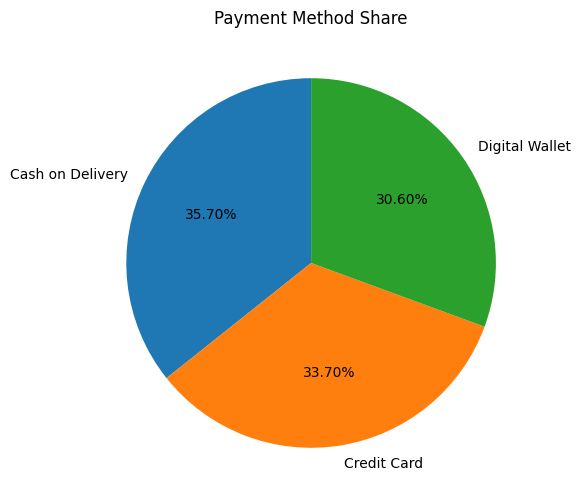

In [3]:
#Pie Chart: Payment Method Distribution
if 'Payment Method' in df.columns:
    payment_counts = df['Payment Method'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.2f%%', startangle=90)
    plt.title('Payment Method Share')
    plt.show()



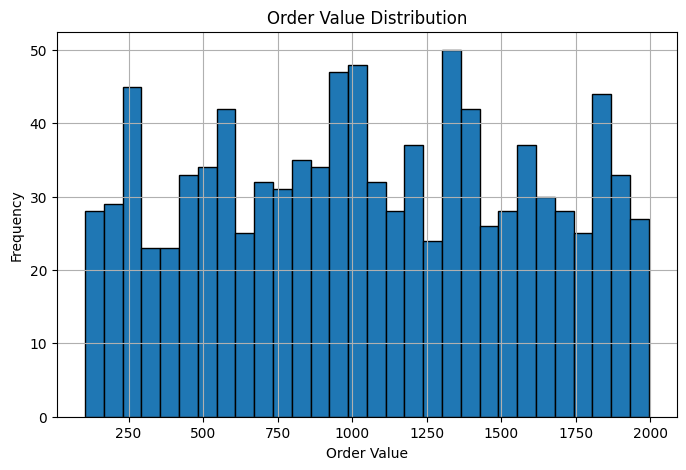

In [4]:
# Histogram: Order Value Distribution
if 'Order Value' in df.columns:
    plt.figure(figsize=(8,5))
    plt.hist(df['Order Value'], bins=30, edgecolor='black')
    plt.title('Order Value Distribution')
    plt.xlabel('Order Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



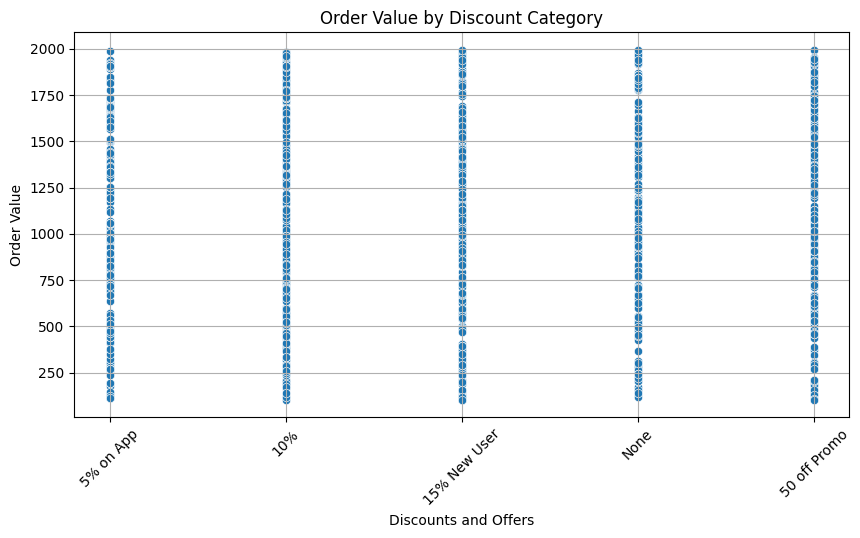

In [5]:
# Scatter Plot: Order Value vs Discount Category
if 'Discounts and Offers' in df.columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x='Discounts and Offers', y='Order Value', data=df)
    plt.title('Order Value by Discount Category')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()



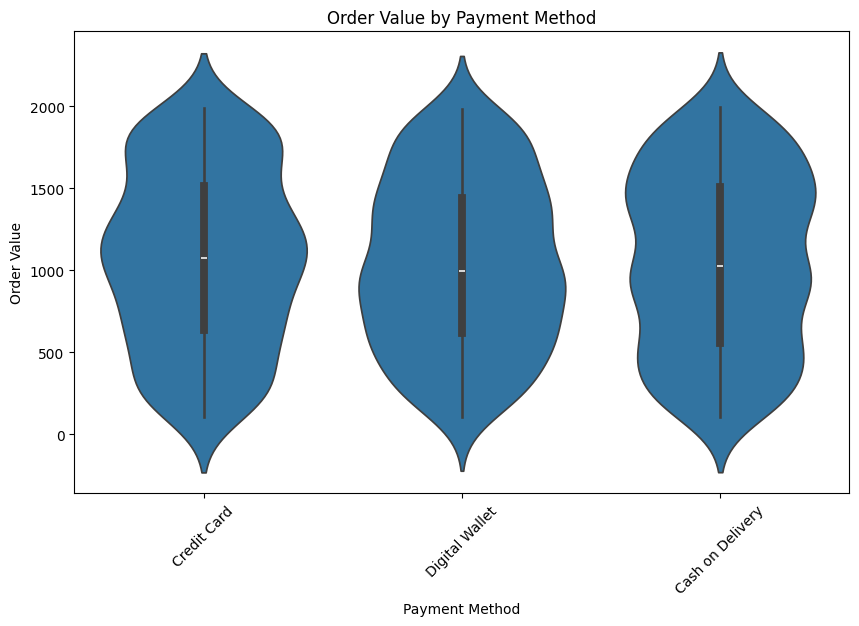

In [6]:
# Violin Plot: Discounts Across Payment Methods
if 'Payment Method' in df.columns:
    plt.figure(figsize=(10,6))
    sns.violinplot(x='Payment Method', y='Order Value', data=df)
    plt.title('Order Value by Payment Method')
    plt.xticks(rotation=45)
    plt.show()




In [7]:
# Pie Chart: Refunds by Payment Method
if 'Refund Status' in df.columns and 'Payment Method' in df.columns:
    refund_data = df[df['Refund Status'] == 'Yes']['Payment Method'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(refund_data, labels=refund_data.index, autopct='%1.2f%%')
    plt.title('Refunds by Payment Method')
    plt.show()



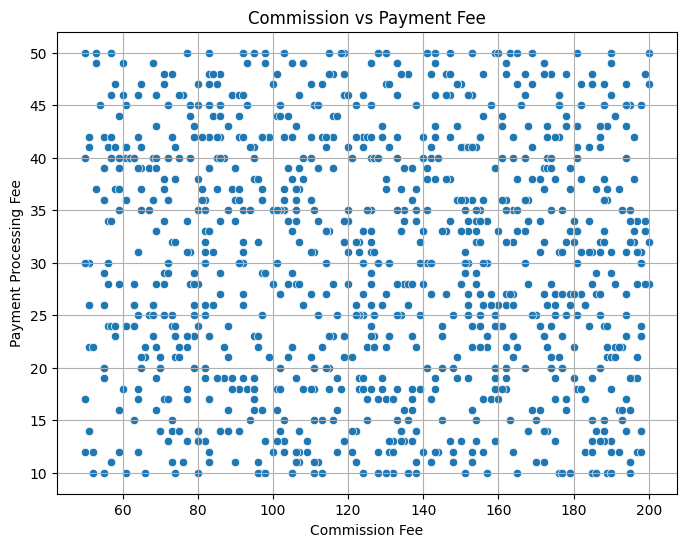

In [8]:
# Scatter Plot: Commission Fee vs Payment Processing Fee
if 'Commission Fee' in df.columns and 'Payment Processing Fee' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Commission Fee', y='Payment Processing Fee', data=df)
    plt.title('Commission vs Payment Fee')
    plt.grid(True)
    plt.show()



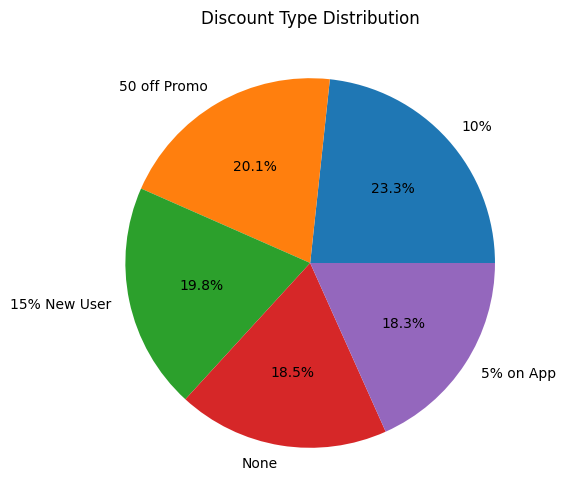

In [9]:
# Pie Chart: Discount Type Percentage
if 'Discounts and Offers' in df.columns:
    discount_pct = df['Discounts and Offers'].value_counts(normalize=True) * 100
    plt.figure(figsize=(6,6))
    plt.pie(discount_pct, labels=discount_pct.index, autopct='%1.1f%%')
    plt.title('Discount Type Distribution')
    plt.show()



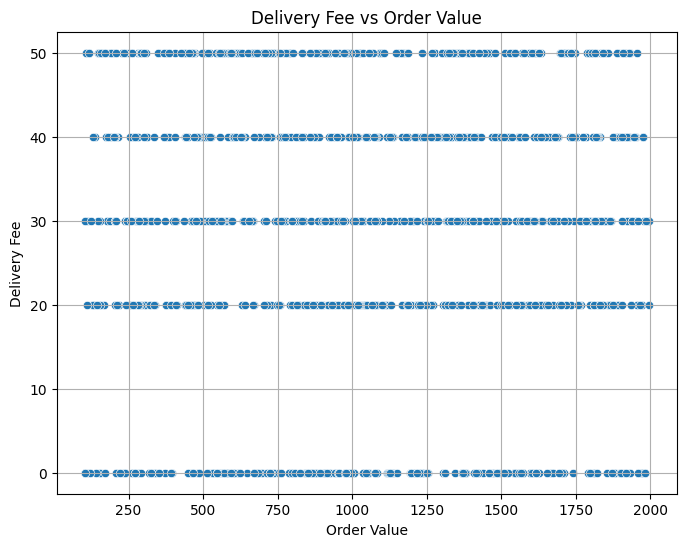

In [12]:
# Scatter: Delivery Fee vs Order Value
if 'Delivery Fee' in df.columns and 'Order Value' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Order Value', y='Delivery Fee', data=df)
    plt.title('Delivery Fee vs Order Value')
    plt.grid(True)
    plt.show()





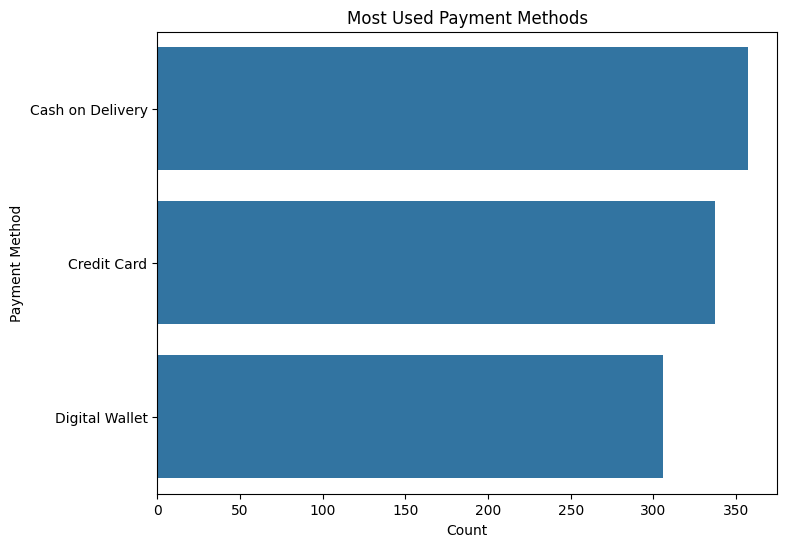

In [11]:
# Bar Chart: Most Used Payment Method
if 'Payment Method' in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(y='Payment Method', data=df, order=df['Payment Method'].value_counts().index)
    plt.title('Most Used Payment Methods')
    plt.xlabel('Count')
    plt.ylabel('Payment Method')
    plt.show()

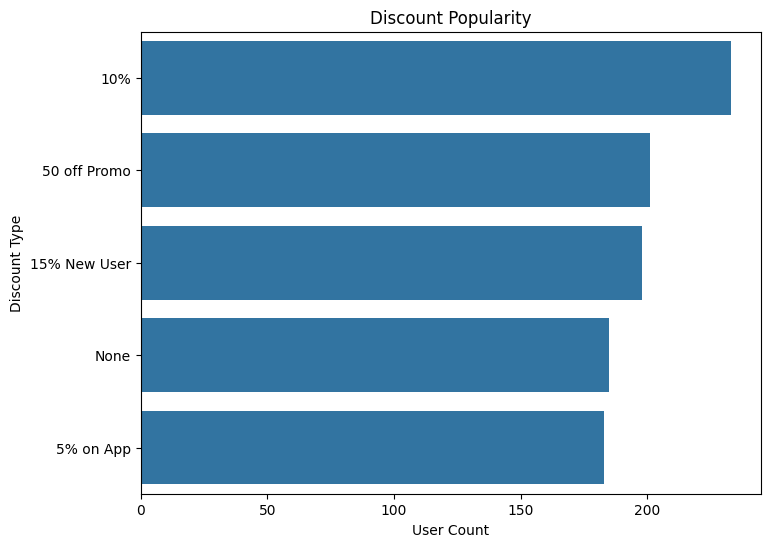

In [ ]:
# Bar Chart: Discount With Highest User Count
if 'Discounts and Offers' in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(y='Discounts and Offers', data=df, order=df['Discounts and Offers'].value_counts().index)
    plt.title('Discount Popularity')
    plt.xlabel('User Count')
    plt.ylabel('Discount Type')
    plt.show()



In [13]:

# Step 6: Save Cleaned Data
df.to_csv("Food Order ND Cleaned Data.csv", index=False)
files.download("Food Order ND Cleaned Data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>